In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
from collections import defaultdict
import networkx as nx
from matplotlib import pyplot as plt

In [2]:
df= pd.read_excel("Book1.xlsx")

In [3]:
df

,FromNodeId,ToNodeId
0,30,1412
1,30,3352
2,30,5254
3,30,5543
4,30,7478
...,...,...
103684,8272,4940
103685,8273,4940
103686,8150,8275
103687,8150,8276


In [4]:
source_list = df['FromNodeId'].tolist()
target_list = df['ToNodeId'].tolist()
total_list = source_list+target_list

In [5]:
new_node_list = []
for node in total_list:
    if node not in new_node_list:
        new_node_list.append(node)  

In [6]:
l=len(new_node_list)
dim = (l , l)
adjacent_matrix = np.zeros(dim)

In [7]:
# adjacency_list
adjacency_list = defaultdict(list)
for i in range(len(source_list)):
    adjacency_list[source_list[i]].append(target_list[i])

In [8]:
#adjacency_matrix
for i in range(len(source_list)):
    row = new_node_list.index(source_list[i])
    col = new_node_list.index(target_list[i])
    adjacent_matrix[row][col] = 1
    

In [9]:
G = nx.DiGraph()

In [10]:
for i in range(l):
    for j in range(l):
        if adjacent_matrix[i][j] == 1: 
              G.add_edge(i,j) 
        

In [11]:
G.number_of_nodes()

7115

In [12]:
def get_page_rank(itera , page_rank_list , G):
    d=0.85
    n = len(page_rank_list)
    for i in range(itera):
        for node in range(len(page_rank_list)):
            in_neighbors = G.predecessors(node)
            page_rank_sum=0
            for neighbor in in_neighbors:
                page_rank_sum = page_rank_sum + page_rank_list[neighbor]/len(list(G.successors(neighbor)))
            
                
            random_walk = d/n
            page_rank_list[node] = random_walk + (1-d) * page_rank_sum
    
    return page_rank_list
    

In [13]:
page_rank_list = []
for i in range(l):
    page_rank_list.append(1)  

In [14]:
#without library
itera = 100
final_page_rank = get_page_rank(itera ,page_rank_list , G)

In [15]:
#with library
pr = nx.pagerank(G , max_iter=100)

In [19]:
hub,authority = nx.hits(G)

In [20]:
my_hub_key = hub.keys()
my_auth_key = authority.keys()
my_pr_key = pr.keys()

In [21]:
my_hub_key = list(my_hub_key)
my_auth_key = list(my_auth_key)
my_pr_key = list(my_pr_key)

In [22]:
new_auth_values = list(authority.values())
new_hub_values = list(hub.values())
new_pr_values = list(pr.values())

<AxesSubplot:xlabel='key_values', ylabel='hub_values'>

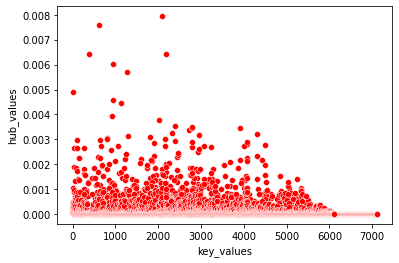

In [82]:
# df = pd.DataFrame(new_hub_values,my_hub_key,columns =['hub_values','key_values'])
df = pd.DataFrame(list(zip(new_hub_values, my_hub_key)),
               columns =['hub_values','key_values'])
sns.scatterplot(x='key_values', y='hub_values', data=df , color='red')

<AxesSubplot:xlabel='key_values', ylabel='auth_values'>

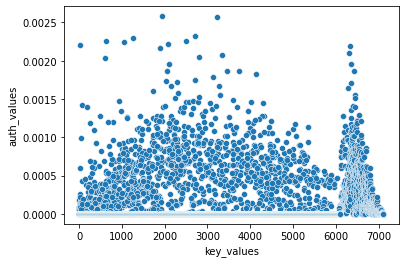

In [79]:
df1 = pd.DataFrame(list(zip(new_auth_values, my_auth_key)),
               columns =['auth_values','key_values'])
sns.scatterplot(x='key_values', y='auth_values', data=df1,palette="deep")

<AxesSubplot:xlabel='key_values', ylabel='pr_values'>

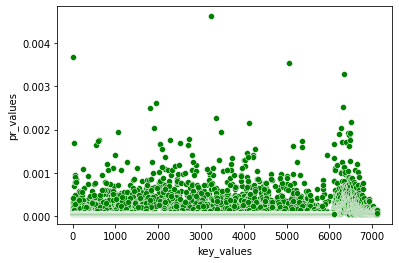

In [23]:
df = pd.DataFrame(list(zip(new_pr_values, my_pr_key)),
               columns =['pr_values','key_values'])
sns.scatterplot(x='key_values', y='pr_values', data=df , color='green')

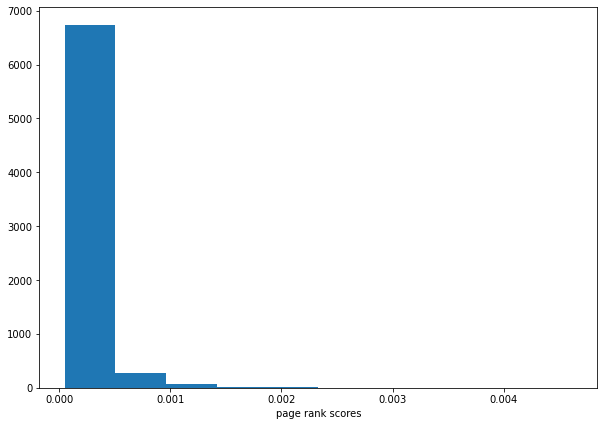

In [28]:
a = np.array(new_pr_values)
fig, ax = plt.subplots(figsize =(10, 7))
plt.xlabel("page rank scores")
ax.hist(a, bins = 10)
plt.show()

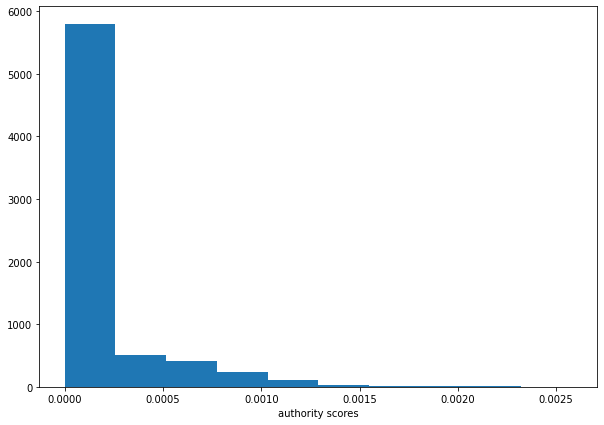

In [29]:
a = np.array(new_auth_values)
fig, ax = plt.subplots(figsize =(10, 7))
plt.xlabel("authority scores")
ax.hist(a, bins = 10)
plt.show()

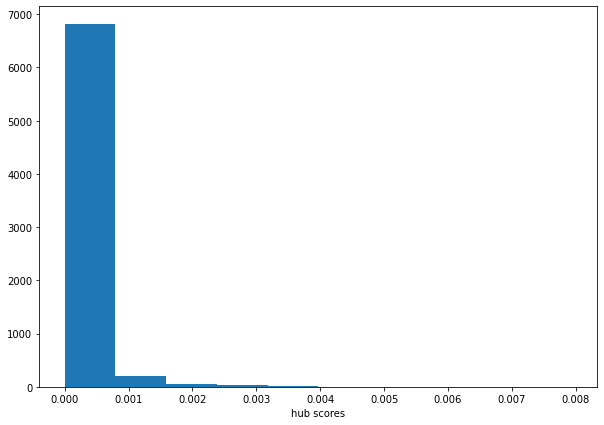

In [30]:
a = np.array(new_hub_values)
fig, ax = plt.subplots(figsize =(10, 7))
plt.xlabel("hub scores")
ax.hist(a, bins = 10)
plt.show()

In [47]:
new_hub_values1 = set(new_hub_values)
new_auth_values1 = set(new_auth_values)

In [48]:
# node_freq = []
# for hub in new_hub_values1:
#     node_freq.append(new_hub_values.count(hub))
# node_freq1=[]
# for auth in new_auth_values1:
#     node_freq1.append(new_auth_values.count(auth))